In [28]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('diabetes').getOrCreate()
df = spark.read.csv('Datasets/04DataTransformation.csv', inferSchema=True, header=True)

In [29]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

import tabulate
table = tabulate.tabulate(corrmatrix, tablefmt='html')
table

1,0.00213053,-0.00389368,-0.00223234,0.00176249,0.00897969,-0.0115912,-0.00110389,0.00510319,-0.0113113,-0.0146832,0.00322561,-0.00641338,0.00261939,-0.00515221,-0.0280491,-0.0336911
0.00213053,1,0.370841,0.283045,0.279831,0.301737,0.0792161,0.119951,0.204465,-0.154525,-0.0556354,-0.0774284,-0.0885265,0.0415286,0.272107,-0.170998,-0.225622
-0.00389368,0.370841,1,0.311591,0.231001,0.249864,0.0877909,0.128536,0.205656,-0.131705,-0.0366966,-0.0627474,-0.0208593,0.0411714,0.332925,-0.142235,-0.185173
-0.00223234,0.283045,0.311591,1,0.121625,0.135048,0.0926,0.0955675,0.17874,-0.0867545,-0.0434628,-0.0455316,-0.0236197,0.0208901,0.242866,-0.0808866,-0.105657
0.00176249,0.279831,0.231001,0.121625,1,0.916745,0.0113134,0.021215,0.0575742,-0.170486,-0.0882681,-0.06005,-0.0553767,0.00323663,-0.045654,-0.10035,-0.122474
0.00897969,0.301737,0.249864,0.135048,0.916745,1,0.0182453,0.0246061,0.0648011,-0.171642,-0.0928643,-0.0630419,-0.0577102,0.0118553,-0.0349747,-0.105315,-0.119924
-0.0115912,0.0792161,0.0877909,0.0926,0.0113134,0.0182453,1,0.0606173,0.122922,-0.0753642,-0.0736112,-0.025624,0.0842341,0.110671,0.100027,-0.138899,-0.106432
-0.00110389,0.119951,0.128536,0.0955675,0.021215,0.0246061,0.0606173,1,0.220849,-0.0761542,-0.0126002,-0.0454151,-0.0243004,0.00327852,0.12105,-0.0771109,-0.137797
0.00510319,0.204465,0.205656,0.17874,0.0575742,0.0648011,0.122922,0.220849,1,-0.0956995,-0.018016,-0.0344564,-0.0309713,0.0976743,0.220686,-0.101415,-0.147392
-0.0113113,-0.154525,-0.131705,-0.0867545,-0.170486,-0.171642,-0.0753642,-0.0761542,-0.0956995,1,0.131748,0.146803,0.0179859,0.0483557,-0.0979293,0.191373,0.198173
-0.0146832,-0.0556354,-0.0366966,-0.0434628,-0.0882681,-0.0928643,-0.0736112,-0.0126002,-0.018016,0.131748,1,0.245394,-0.0260253,-0.0911486,0.0666744,0.0988683,0.0773654


In [30]:
import pandas as pd
pd.set_option('display.max_columns', 16)
df = df.toPandas()
display(abs(df.corr()).sort_values('Diabetes_binary', ascending=False))

,ID,Diabetes_binary,HighBP,HighChol,BMI,BMIBand,Smoker,Stroke,...,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age,Education,Income
Diabetes_binary,0.002131,1.000000,0.370841,0.283045,0.279831,0.301737,0.079216,0.119951,...,0.154525,0.055635,0.077428,0.088526,0.041529,0.272107,0.170998,0.225622
HighBP,0.003894,0.370841,1.000000,0.311591,0.231001,0.249864,0.087791,0.128536,...,0.131705,0.036697,0.062747,0.020859,0.041171,0.332925,0.142235,0.185173
BMIBand,0.008980,0.301737,0.249864,0.135048,0.916745,1.000000,0.018245,0.024606,...,0.171642,0.092864,0.063042,0.057710,0.011855,0.034975,0.105315,0.119924
HighChol,0.002232,0.283045,0.311591,1.000000,0.121625,0.135048,0.092600,0.095568,...,0.086755,0.043463,0.045532,0.023620,0.020890,0.242866,0.080887,0.105657
BMI,0.001762,0.279831,0.231001,0.121625,1.000000,0.916745,0.011313,0.021215,...,0.170486,0.088268,0.060050,0.055377,0.003237,0.045654,0.100350,0.122474
Age,0.005152,0.272107,0.332925,0.242866,0.045654,0.034975,0.100027,0.121050,...,0.097929,0.066674,0.014510,0.051651,0.004516,1.000000,0.108053,0.132622
Income,0.033691,0.225622,0.185173,0.105657,0.122474,0.119924,0.106432,0.137797,...,0.198173,0.077365,0.154059,0.064074,0.159825,0.132622,0.455470,1.000000
HeartDiseaseorAttack,0.005103,0.204465,0.205656,0.178740,0.057574,0.064801,0.122922,0.220849,...,0.095699,0.018016,0.034456,0.030971,0.097674,0.220686,0.101415,0.147392
Education,0.028049,0.170998,0.142235,0.080887,0.100350,0.105315,0.138899,0.077111,...,0.191373,0.098868,0.149282,0.032584,0.045277,0.108053,1.000000,0.455470
PhysActivity,0.011311,0.154525,0.131705,0.086755,0.170486,0.171642,0.075364,0.076154,...,1.000000,0.131748,0.146803,0.017986,0.048356,0.097929,0.191373,0.198173


In [16]:
from sklearn import tree
x= df.drop(['ID', 'Diabetes_binary'], axis=1)
y= df.Diabetes_binary

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 27.50
|   |   |--- feature_12 <= 8.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- feature_14 <= 5.50
|   |   |   |   |   |--- feature_12 <= 5.50
|   |   |   |   |   |   |--- feature_12 <= 1.50
|   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 20.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_14 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_14 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  20.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |-

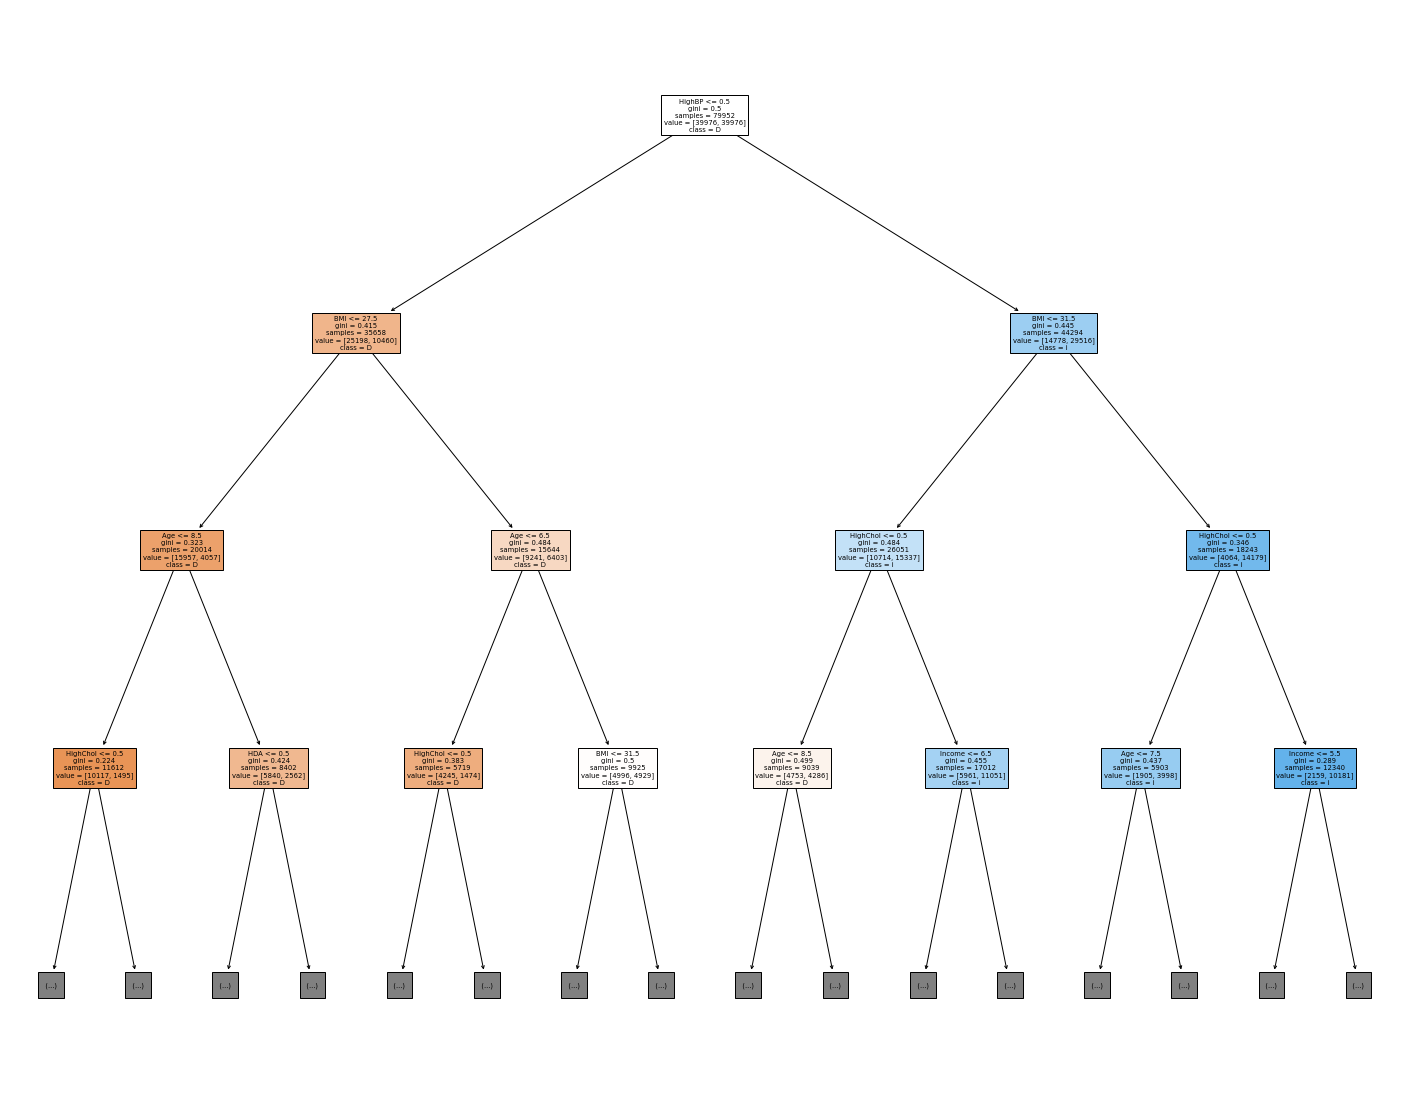

In [31]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, max_depth= 3,
                   feature_names=x.columns.values.tolist(),  
                   class_names=y.name,
                   filled=True)
fig.savefig("decistion_tree.png")

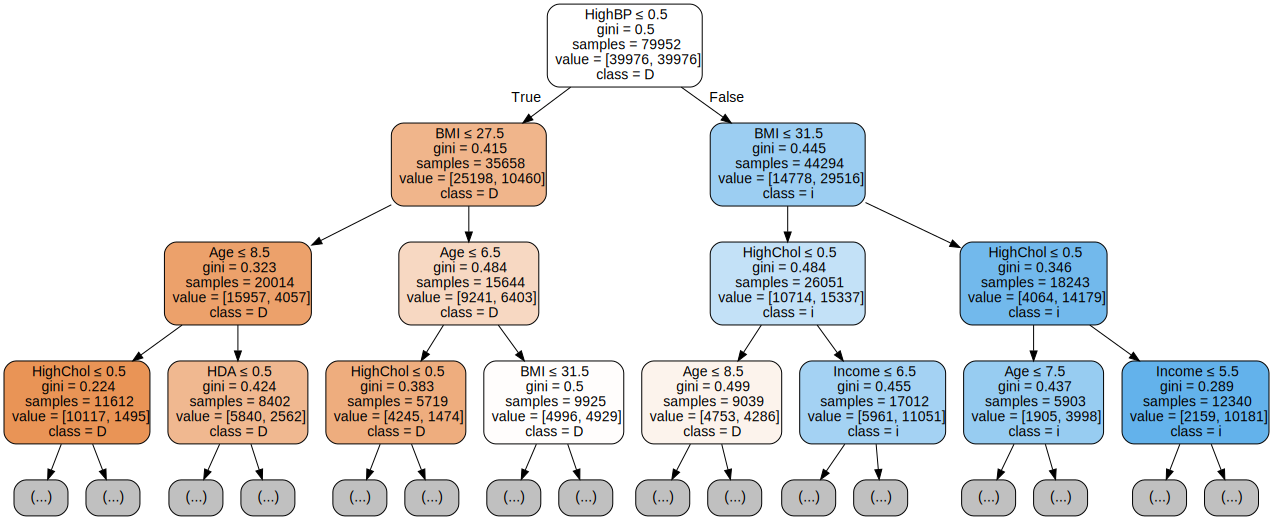

In [32]:
import graphviz 
dot_data = tree.export_graphviz(clf,out_file=None, max_depth= 3,
                      feature_names=x.columns.values.tolist(),  
                      class_names=y.name,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [33]:
for feat, importance in zip(x.columns, clf.feature_importances_):
    print ('{f}: {i}'.format(f=feat, i=importance))

HighBP: 0.15374388234673322
HighChol: 0.02701432592738471
BMI: 0.17972406130926552
BMIBand: 0.018453953419714585
Smoker: 0.05191169877449825
Stroke: 0.01710670917333216
HDA: 0.016395714344677813
PhysActivity: 0.04101218625747711
Fruits: 0.05100763813776896
Veggies: 0.03834004443640707
HAC: 0.013694859396358627
Sex: 0.038388186449188164
Age: 0.15072417471322383
Education: 0.09362466802206616
Income: 0.10885789729190382


<BarContainer object of 15 artists>

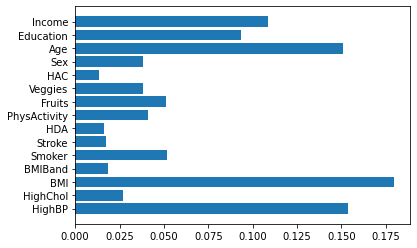

In [34]:
plt.barh(x.columns.values.tolist(), clf.feature_importances_)

In [35]:
for feat, importance in zip(x.columns, clf.feature_importances_):
    print ('{f}: {i}'.format(f=feat, i=importance))

HighBP: 0.15374388234673322
HighChol: 0.02701432592738471
BMI: 0.17972406130926552
BMIBand: 0.018453953419714585
Smoker: 0.05191169877449825
Stroke: 0.01710670917333216
HDA: 0.016395714344677813
PhysActivity: 0.04101218625747711
Fruits: 0.05100763813776896
Veggies: 0.03834004443640707
HAC: 0.013694859396358627
Sex: 0.038388186449188164
Age: 0.15072417471322383
Education: 0.09362466802206616
Income: 0.10885789729190382


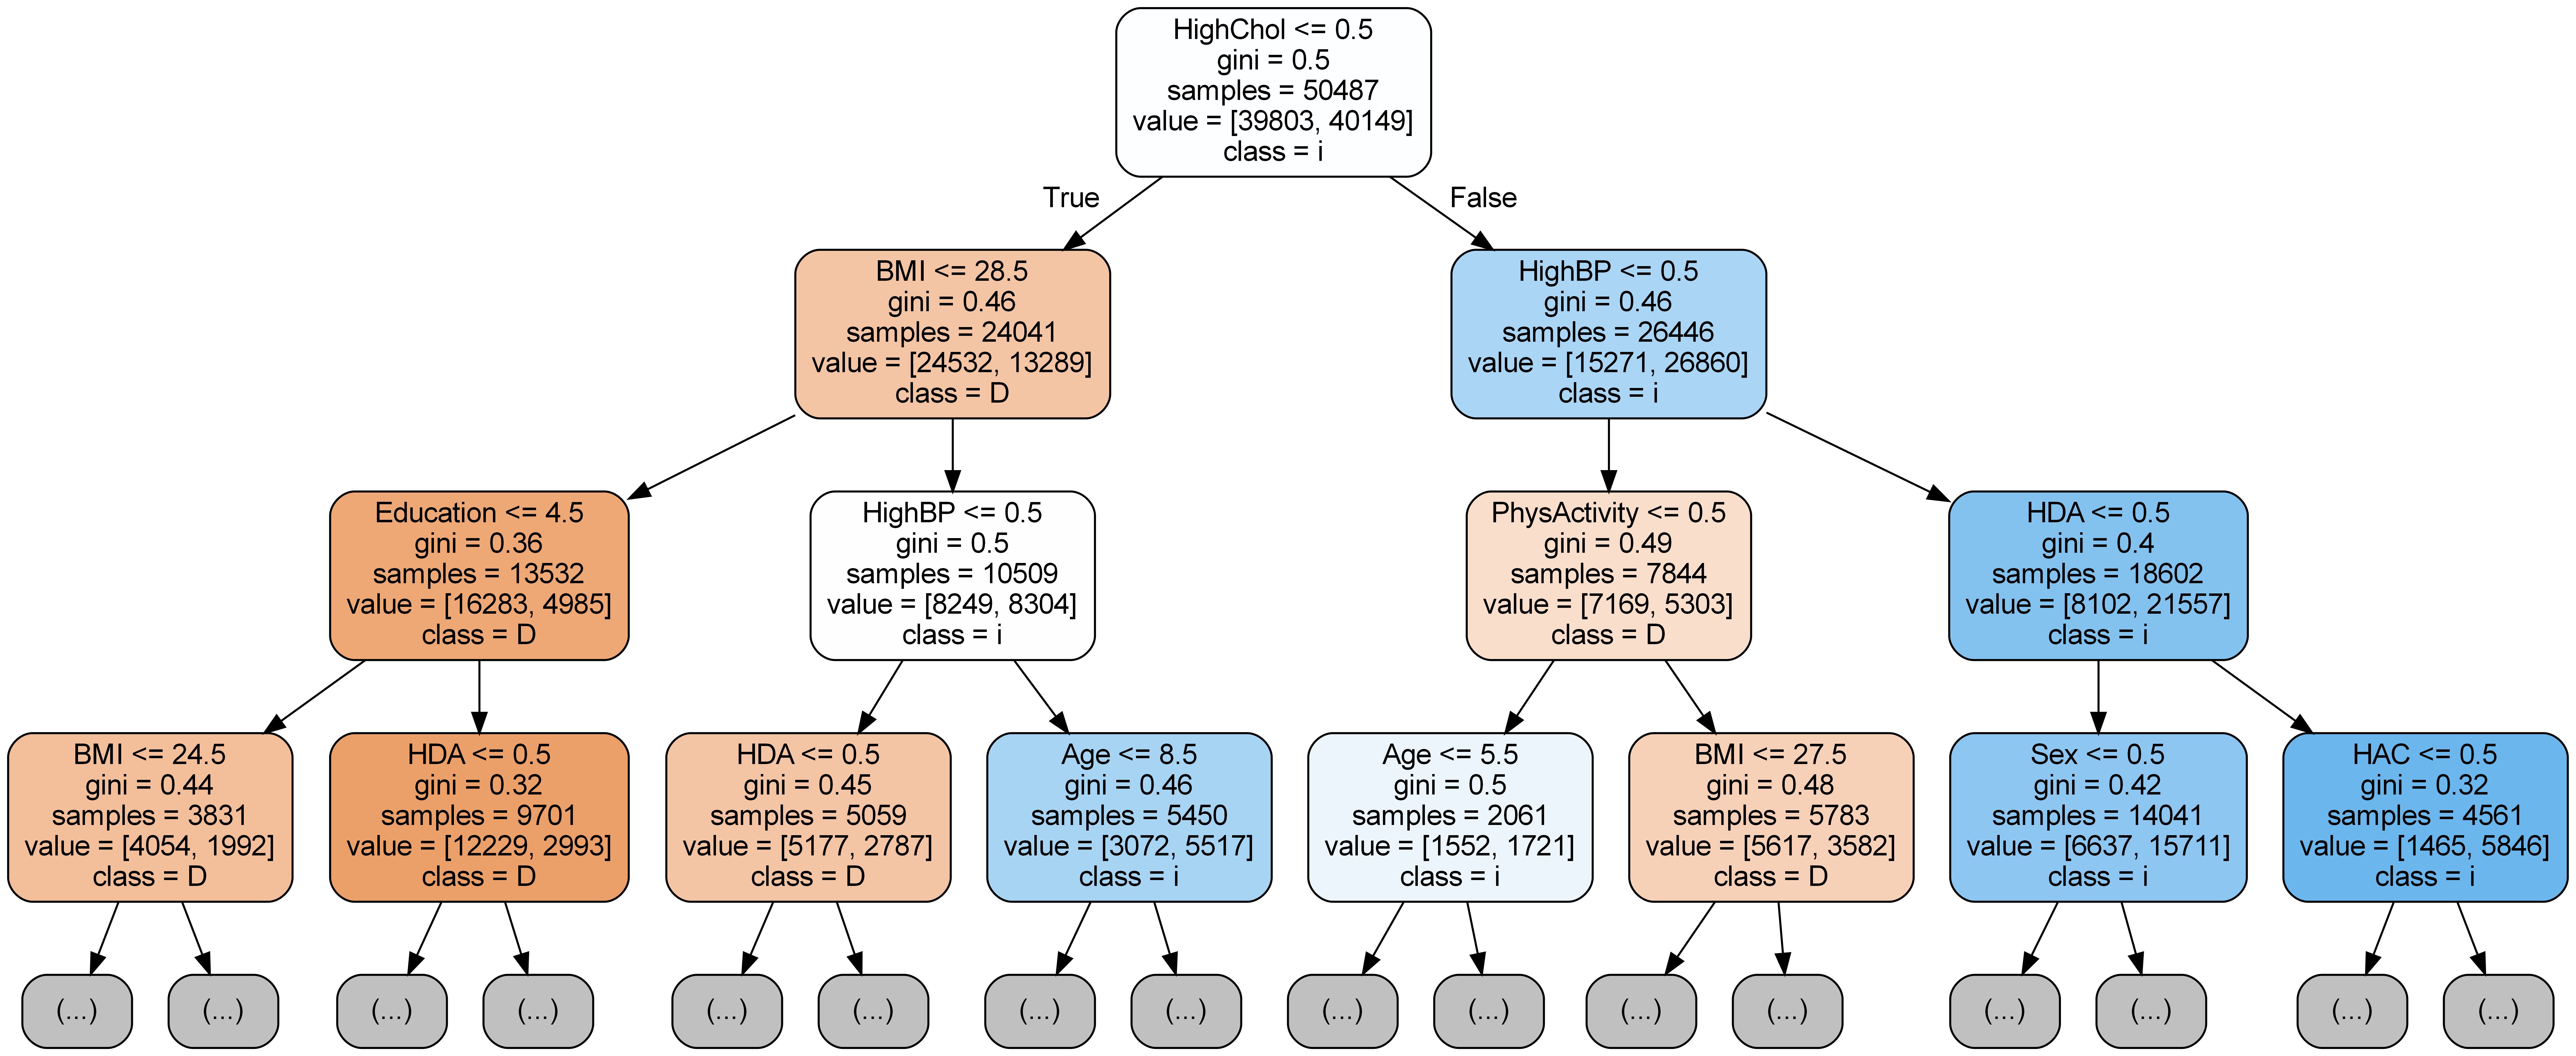

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state = 0)
rf = rf.fit(x, y)
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', max_depth= 3,
                feature_names = x.columns.values.tolist(),
                class_names = y.name,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

<BarContainer object of 15 artists>

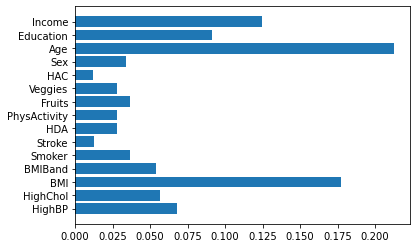

In [36]:
plt.barh(x.columns.values.tolist(), rf.feature_importances_)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lrm = LogisticRegression(random_state=0,solver='lbfgs', max_iter=3000).fit(x, y)
lrm.predict_proba(x)


array([[0.06318521, 0.93681479],
       [0.86972231, 0.13027769],
       [0.49379316, 0.50620684],
       ...,
       [0.13177113, 0.86822887],
       [0.51007571, 0.48992429],
       [0.63383301, 0.36616699]])

In [38]:
confusion_matrix(y, lrm.predict(x))
print(classification_report(y, lrm.predict(x)))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72     39976
           1       0.72      0.75      0.73     39976

    accuracy                           0.73     79952
   macro avg       0.73      0.73      0.73     79952
weighted avg       0.73      0.73      0.73     79952

